# Obesity Dataset Cleaning Notebook
This notebook handles:
- Unifying Feature String Values
- Handling Missing Values
- Removing Duplicated Samples
- Checking for Outlier Samples


In [14]:
import pandas as pd

df = pd.read_csv("../data/Obesity_Dataset.csv")
df.head()

,Gender,Age,Height,Weight,Overweight_Family_History,High_Calorie_Consumption,Vegetable_Consumption,Main_Meals,Snack_Consumption,Smoker,Water_Intake,Calorie_Monitoring,Physical_Activity,Tech_Time,Alcohol_Consumption,Transportation_Mean,Obesity_Level
0,Female,21,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


## Unifying Feature String Values

In [15]:
lower_str = (lambda var: var.lower() if isinstance(var, str) else var)
df[df.select_dtypes(include=["object"]).columns] = df.select_dtypes(include=["object"]).map(lower_str)
df.head()

,Gender,Age,Height,Weight,Overweight_Family_History,High_Calorie_Consumption,Vegetable_Consumption,Main_Meals,Snack_Consumption,Smoker,Water_Intake,Calorie_Monitoring,Physical_Activity,Tech_Time,Alcohol_Consumption,Transportation_Mean,Obesity_Level
0,female,21,1.62,64.0,yes,no,2.0,3.0,sometimes,no,2.0,no,0.0,1.0,no,public_transportation,normal_weight
1,female,21,1.52,56.0,yes,no,3.0,3.0,sometimes,yes,3.0,yes,3.0,0.0,sometimes,public_transportation,normal_weight
2,male,23,1.80,77.0,yes,no,2.0,3.0,sometimes,no,2.0,no,2.0,1.0,frequently,public_transportation,normal_weight
3,male,27,1.80,87.0,no,no,3.0,3.0,sometimes,no,2.0,no,2.0,0.0,frequently,walking,overweight_level_i
4,male,22,1.78,89.8,no,no,2.0,1.0,sometimes,no,2.0,no,0.0,0.0,sometimes,public_transportation,overweight_level_ii


## Handling Missing Values

In [16]:
df.isnull().sum()

Gender                       0
Age                          0
Height                       0
Weight                       0
Overweight_Family_History    0
High_Calorie_Consumption     0
Vegetable_Consumption        0
Main_Meals                   0
Snack_Consumption            0
Smoker                       0
Water_Intake                 0
Calorie_Monitoring           0
Physical_Activity            0
Tech_Time                    0
Alcohol_Consumption          0
Transportation_Mean          0
Obesity_Level                0
dtype: int64

## Removing Duplicated Samples

In [17]:
df.duplicated().sum()

24

In [18]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

## Removing Duplicated Samples

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2087 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Gender                     2087 non-null   object 
 1   Age                        2087 non-null   int64  
 2   Height                     2087 non-null   float64
 3   Weight                     2087 non-null   float64
 4   Overweight_Family_History  2087 non-null   object 
 5   High_Calorie_Consumption   2087 non-null   object 
 6   Vegetable_Consumption      2087 non-null   float64
 7   Main_Meals                 2087 non-null   float64
 8   Snack_Consumption          2087 non-null   object 
 9   Smoker                     2087 non-null   object 
 10  Water_Intake               2087 non-null   float64
 11  Calorie_Monitoring         2087 non-null   object 
 12  Physical_Activity          2087 non-null   float64
 13  Tech_Time                  2087 non-null   float64
 1

In [20]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,2087.0,24.356493,6.379977,14.00,20.000,23.000,26.000,61.00
Height,2087.0,1.702616,0.093251,1.45,1.630,1.700,1.770,1.98
Weight,2087.0,86.858706,26.190838,39.00,66.000,83.100,108.015,173.00
Vegetable_Consumption,2087.0,2.421409,0.534807,1.00,2.000,2.400,3.000,3.00
Main_Meals,2087.0,2.701203,0.764655,1.00,2.700,3.000,3.000,4.00
Water_Intake,2087.0,2.004792,0.608281,1.00,1.590,2.000,2.465,3.00
Physical_Activity,2087.0,1.012827,0.853496,0.00,0.125,1.000,1.680,3.00
Tech_Time,2087.0,0.663031,0.608152,0.00,0.000,0.631,1.000,2.00


In [21]:
df.nunique()

Gender                          2
Age                            40
Height                         51
Weight                       1335
Overweight_Family_History       2
High_Calorie_Consumption        2
Vegetable_Consumption         180
Main_Meals                    256
Snack_Consumption               4
Smoker                          2
Water_Intake                  201
Calorie_Monitoring              2
Physical_Activity             257
Tech_Time                     813
Alcohol_Consumption             4
Transportation_Mean             5
Obesity_Level                   7
dtype: int64

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt


def get_outliers(input_df: pd.DataFrame, col: str, verbose=False) -> (float, float, pd.DataFrame):
    q1 = input_df[col].quantile(0.25)
    q3 = input_df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - (iqr * 1.5)
    upper_bound = q3 + (iqr * 1.5)
    outliers = input_df[(input_df[col] < lower_bound) | (input_df[col] > upper_bound)].copy()
    if verbose:
        print(f"Column: {col}")
        print(f"There exists: {len(outliers)} outliers out of {len(input_df)} samples")
        if not outliers.empty:
            print(f"Their share: {len(outliers) / len(input_df):.2f}%")
            print(f"The lower and upper bounds are ({lower_bound}, {upper_bound})")
            print("Example samples:")
            print(outliers[col].head())
        sns.boxplot(data=input_df, y=col)
        plt.title(f"{col} Feature Boxplot")
        plt.show()
        print("-" * 100)
    return lower_bound, upper_bound, outliers

Column: Age
There exists: 160 outliers out of 2087 samples
Their share: 0.08%
The lower and upper bounds are (11.0, 35.0)
Example samples:
13     41
21     52
33     39
92     55
104    38
Name: Age, dtype: int64


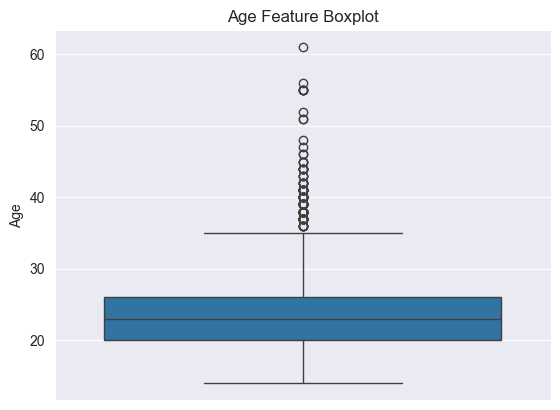

----------------------------------------------------------------------------------------------------
Column: Height
There exists: 0 outliers out of 2087 samples


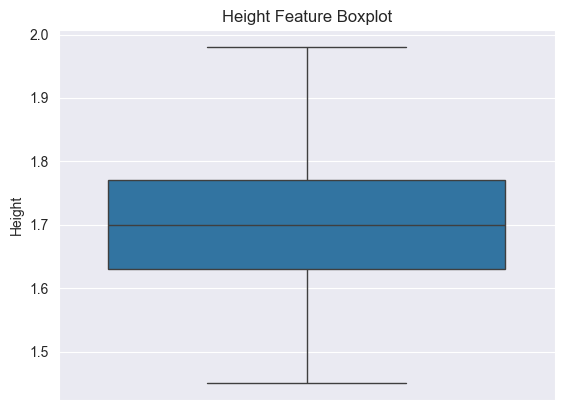

----------------------------------------------------------------------------------------------------
Column: Weight
There exists: 1 outliers out of 2087 samples
Their share: 0.00%
The lower and upper bounds are (2.977499999999999, 171.0375)
Example samples:
344    173.0
Name: Weight, dtype: float64


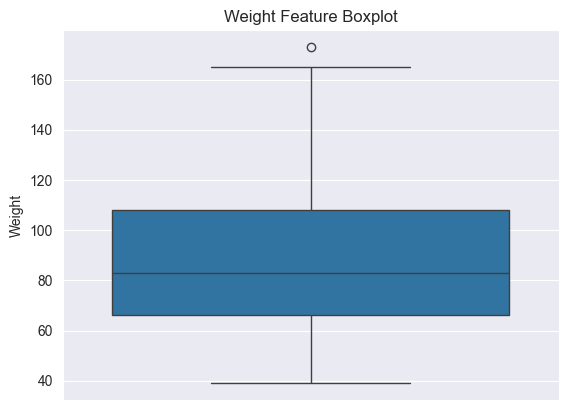

----------------------------------------------------------------------------------------------------
Column: Vegetable_Consumption
There exists: 0 outliers out of 2087 samples


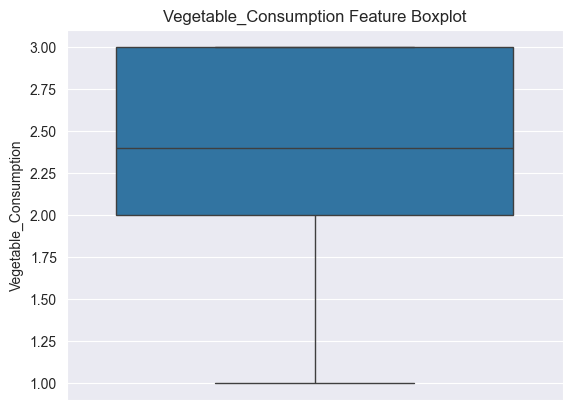

----------------------------------------------------------------------------------------------------
Column: Main_Meals
There exists: 578 outliers out of 2087 samples
Their share: 0.28%
The lower and upper bounds are (2.2500000000000004, 3.4499999999999997)
Example samples:
4     1.0
14    1.0
16    1.0
17    1.0
18    4.0
Name: Main_Meals, dtype: float64


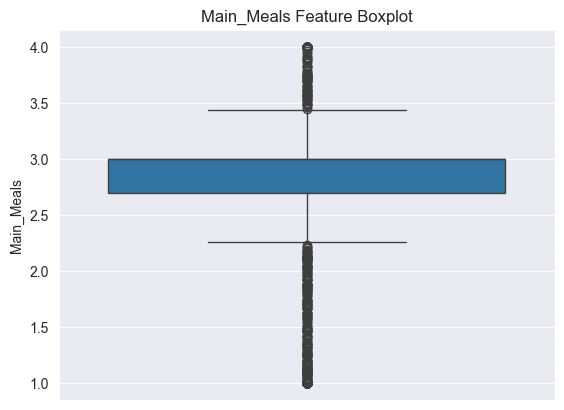

----------------------------------------------------------------------------------------------------
Column: Water_Intake
There exists: 0 outliers out of 2087 samples


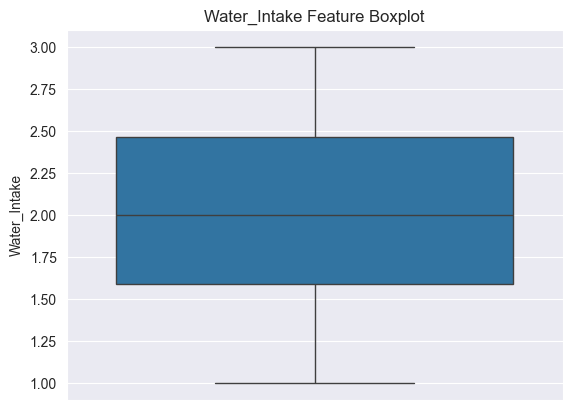

----------------------------------------------------------------------------------------------------
Column: Physical_Activity
There exists: 0 outliers out of 2087 samples


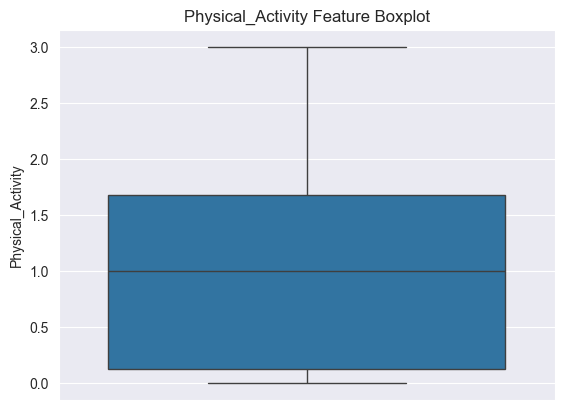

----------------------------------------------------------------------------------------------------
Column: Tech_Time
There exists: 0 outliers out of 2087 samples


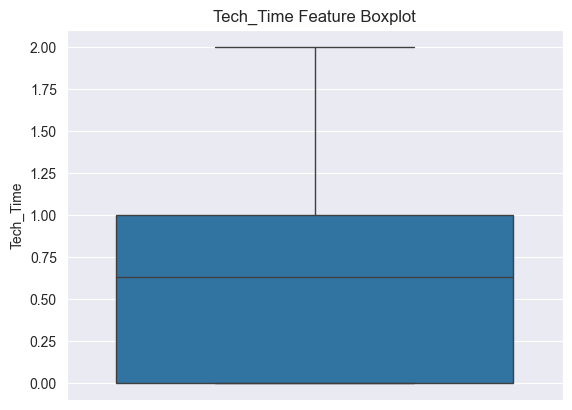

----------------------------------------------------------------------------------------------------


In [23]:
for column in df.select_dtypes(exclude=["object"]).columns:
    get_outliers(df, column, verbose=True)

#### It doesn't appear that these are unwanted outliers, but rather outliers that are acceptable

In [24]:
df.to_csv("../data/Obesity_Dataset_Cleaned.csv", index=False)